In [1]:
import sys

from PIL import Image
import data as img_data
import os.path as osp
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal, ogr # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/
import itertools

In [6]:
train_data_path = osp.abspath(osp.join(osp.realpath('__file__') ,"../../../data/imgs/train_features"))
train_label_path = osp.abspath(osp.join(osp.realpath('__file__') ,"../../../data/imgs/train_agbm"))

In [7]:
def get_data_from_path(path):
    img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(img_path)
    data = dataset.ReadAsArray()
    return data

all_imgs = get_data_from_path("000aa810_S1_07.tif") # 0a3d8f03_S2_00.tif
print(all_imgs.shape)
for d in all_imgs:
    plt.imshow(d)
    plt.show()

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

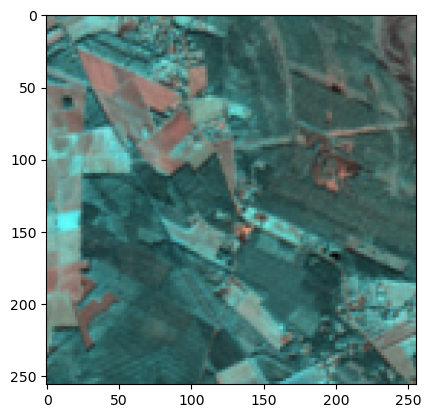

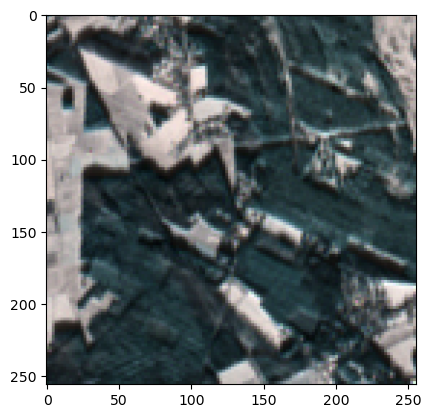

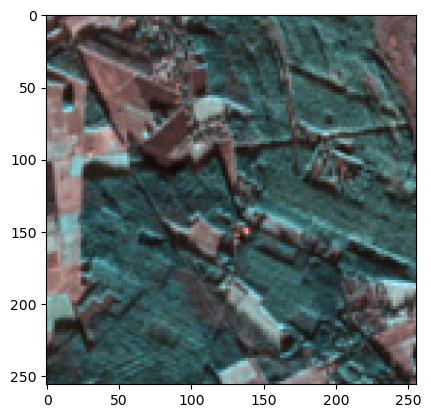

'NoneType' object has no attribute 'GetRasterBand'
'NoneType' object has no attribute 'GetRasterBand'


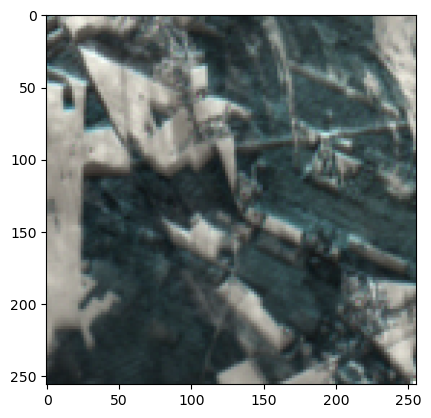

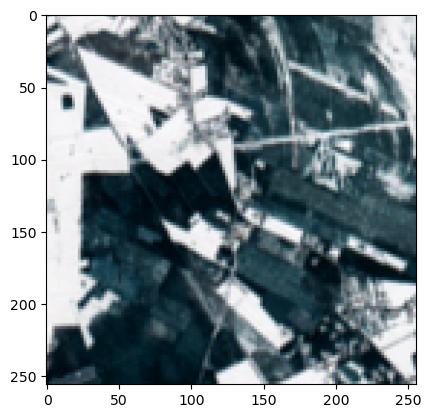

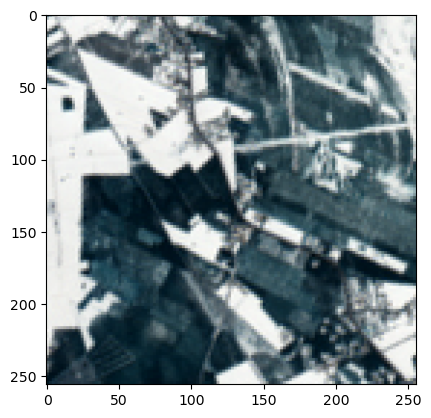

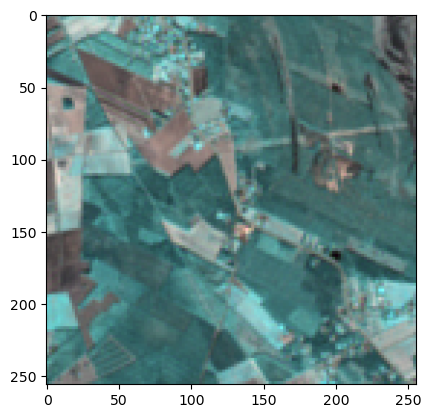

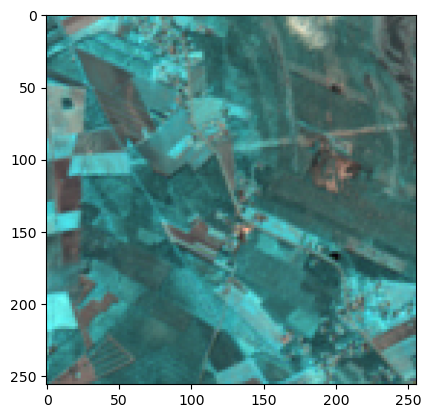

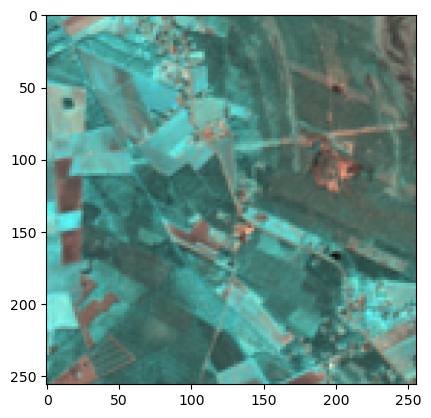

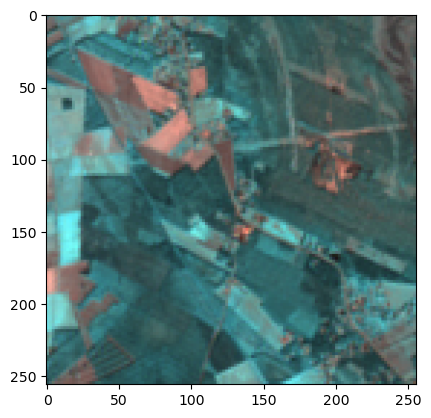

In [12]:

for i in range(0, 12):

    try:

        num = str(i)

        if len(num) == 1:
            num = "0" + num

        path = f"36a8ed58_S2_{num}.tif" # 0a3d8f03_S2_00.tif

        img_path = osp.join(train_data_path, path)
        dataset = gdal.Open(img_path)

        b1 = dataset.GetRasterBand(1).ReadAsArray()
        b2 = dataset.GetRasterBand(2).ReadAsArray()
        b3 = dataset.GetRasterBand(3).ReadAsArray()

        b4 = dataset.GetRasterBand(4).ReadAsArray()
        b5 = dataset.GetRasterBand(5).ReadAsArray()
        b6 = dataset.GetRasterBand(6).ReadAsArray()

        b7 = dataset.GetRasterBand(7).ReadAsArray()
        b8 = dataset.GetRasterBand(8).ReadAsArray()
        b9 = dataset.GetRasterBand(9).ReadAsArray()

        b10 = dataset.GetRasterBand(10).ReadAsArray()
        b11 = dataset.GetRasterBand(11).ReadAsArray()

        b1 = b1 * (1 / b1.max())
        b2 = b2 * (1 / b2.max())
        b3 = b3 * (1 / b3.max())
        b4 = b4 * (1 / b4.max())
        b5 = b5 * (1 / b5.max())
        b6 = b6 * (1 / b6.max())
        b7 = b7 * (1 / b7.max())
        b8 = b8 * (1 / b8.max())
        b9 = b9 * (1 / b9.max())
        b10 = b10 * (1 / b10.max())
        b11 = b11 * (1 / b11.max())

        img_1 = np.dstack((b4, b5, b6))

        f = plt.figure()

        plt.imshow(img_1)
        plt.show()

    except Exception as e: print(e)

# for d in all_imgs:
#     plt.imshow(d, cmap=plt.cm.turbo)
#     plt.show()

In [ ]:
agbm_path = "000aa810_agbm.tif"

img_path = osp.join(train_label_path, agbm_path)
dataset = gdal.Open(img_path)

img_1 = dataset.GetRasterBand(1).ReadAsArray()

img_1 = img_1 * (1 / img_1.max())

imshow(img_1, cmap=plt.cm.binary)

In [12]:
for i in range(0, 12):

    try:

        num = str(i)

        if len(num) == 1:
            num = "0" + num

        path = f"000aa810_S2_{num}.tif" # 0a3d8f03_S2_00.tif

        img_path = osp.join(train_data_path, path)
        dataset = gdal.Open(img_path)

        for i in range(1, 12):

            print(f"Image {num} band {i}")

            band = dataset.GetRasterBand(i)

            if band.GetMinimum() is None or band.GetMaximum()is None:
                band.ComputeStatistics(0)

            band.GetMetadata()

            print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
            print ("[ MIN ] = ", band.GetMinimum())
            print ("[ MAX ] = ", band.GetMaximum())
            print ("[ NAME ] = ", band.GetDescription)

            print("----------------------------")

        print("##############################")

    except Exception as e: print(e)

Image 00 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 01 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 02 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 03 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 04 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 05 band 1
'NoneType' object has no attribute 'GetRasterBand'
Image 06 band 1
[ NO DATA VALUE ] =  None
[ MIN ] =  1.0
[ MAX ] =  6527.0
[ NAME ] =  <bound method MajorObject.GetDescription of <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002906E9840C0> >>
----------------------------
Image 06 band 2
[ NO DATA VALUE ] =  None
[ MIN ] =  1.0
[ MAX ] =  5769.0
[ NAME ] =  <bound method MajorObject.GetDescription of <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002906EBCB630> >>
----------------------------
Image 06 band 3
[ NO DATA VALUE ] =  None
[ MIN ] =  1.0
[ MAX ] =  5715.0
[ NAM